In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
x = np.linspace(0,10,500)
y=np.cumsum(np.random.randn(500,6),0)

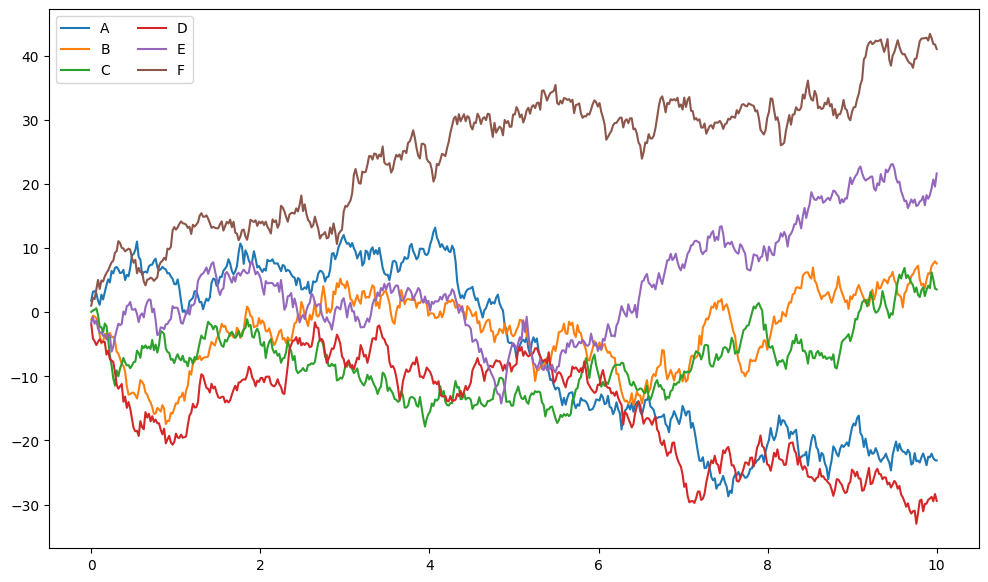

In [19]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [20]:
import requests
import pandas as pd

In [26]:
def get_historic_price(symbol, exchange="bitfinex", after="2018-09-01"):
    url="https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc".format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods':'3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime']=pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [23]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-07-13 10:04:59.128946')

In [27]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [29]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [34]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02
mean,30338.329480,30400.919075,30269.184971,30336.670520,71.696391,2.183974e+06
std,442.270347,458.706808,433.033352,442.720831,88.944192,2.732368e+06
min,29702.000000,29812.000000,29521.000000,29705.000000,0.974557,2.946744e+04
25%,30039.000000,30096.000000,29968.000000,30040.000000,22.566510,6.763068e+05
50%,30276.000000,30312.000000,30223.000000,30275.000000,40.880013,1.227180e+06
75%,30342.000000,30370.000000,30308.000000,30340.000000,78.100888,2.410834e+06
max,31637.000000,31818.000000,31422.000000,31637.000000,561.671542,1.709718e+07


In [30]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-07-13 11:00:00,30580,30630,30533,30577,87.973807,2.689469e+06
2023-07-13 12:00:00,30587,30600,30546,30546,32.828276,1.003575e+06
2023-07-13 13:00:00,30546,30592,30470,30522,87.653236,2.677071e+06
2023-07-13 14:00:00,30522,30692,30510,30673,96.676923,2.960066e+06
2023-07-13 15:00:00,30674,30692,30483,30577,107.956903,3.300737e+06


<Axes: xlabel='CloseTime'>

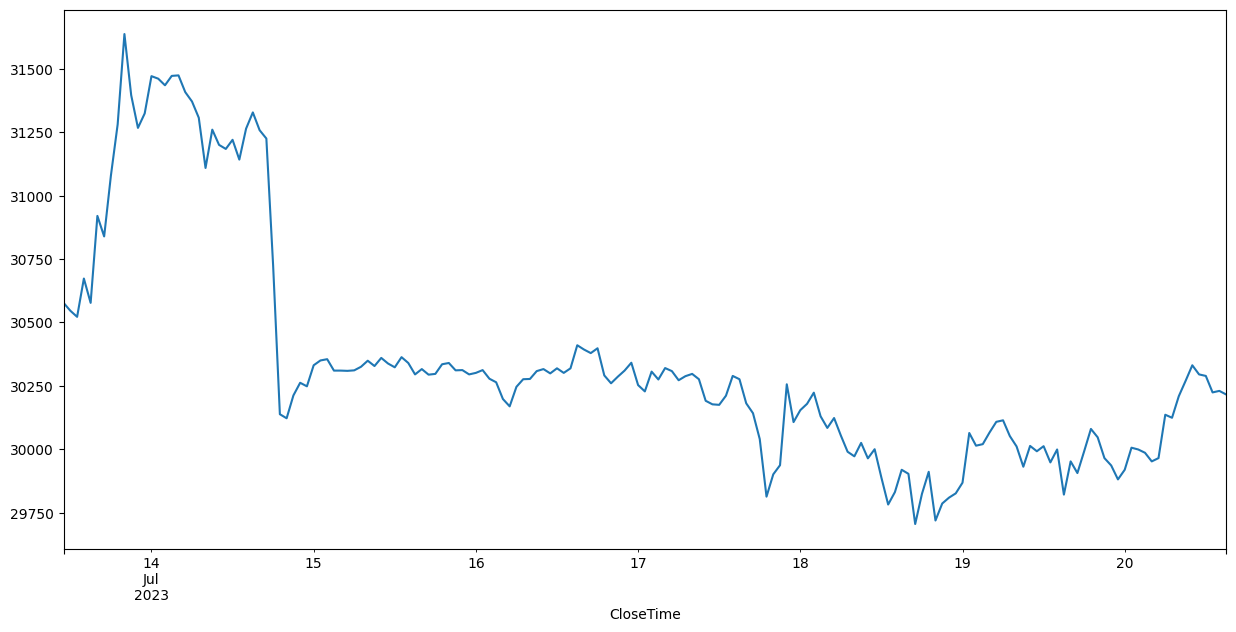

In [31]:
btc['ClosePrice'].plot(figsize=(15,7))

<Axes: xlabel='CloseTime'>

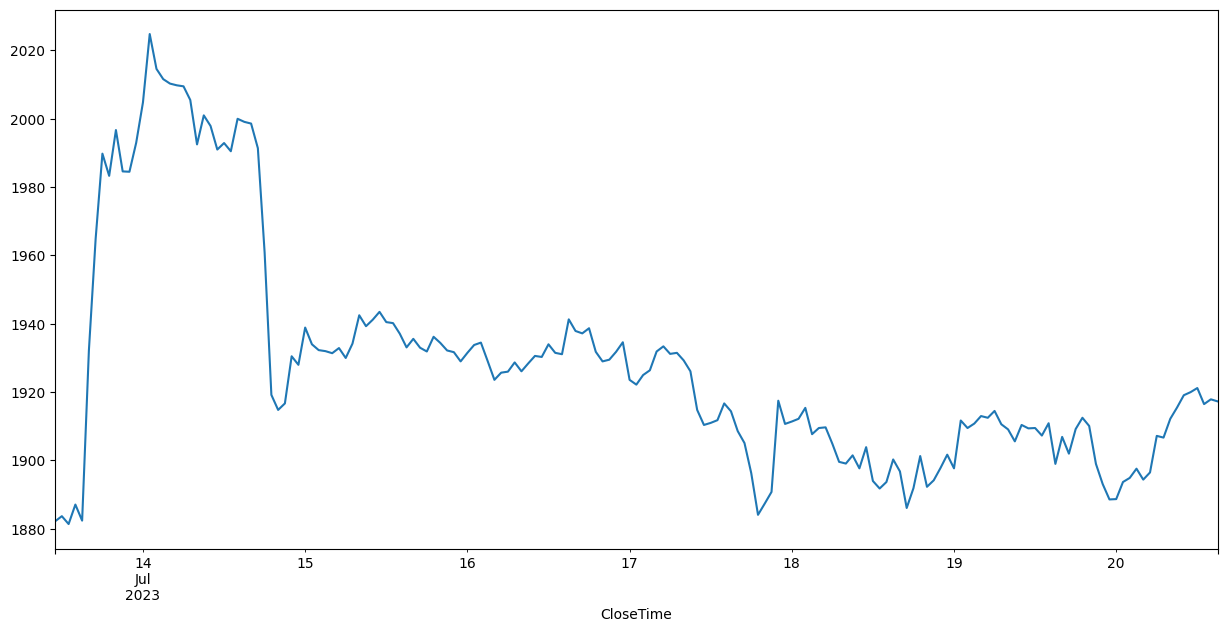

In [32]:
eth.head()
eth['ClosePrice'].plot(figsize=(15,7))

In [33]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-07-13 11:00:00,1882.6,1883.6,1880.0,1882.2,28.929569,54460.769843
2023-07-13 12:00:00,1882.4,1885.2,1882.2,1883.7,14.744840,27769.007915
2023-07-13 13:00:00,1883.7,1885.3,1876.5,1881.4,269.545518,507199.817101
2023-07-13 14:00:00,1880.5,1887.9,1879.8,1887.1,75.999589,143115.982122
2023-07-13 15:00:00,1887.2,1887.2,1878.2,1882.4,184.384788,347076.250615


In [36]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [37]:
output_notebook()

Loading BokehJS ...

In [50]:
p1=figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label="Date"
p1.yaxis.axis_label="Price"

btc_line = p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
p1.legend.location = "top_left"

show(p1)
